# Q-1

-Load the houseprices data from Kaggle

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

pd.options.display.max_columns = None

In [2]:
housePrices = pd.read_csv("house_train.csv")
housePrices.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
housePrices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
for col in housePrices.columns:
    print(housePrices[col].name,":",sum(pd.isnull(housePrices[col])))

Id : 0
MSSubClass : 0
MSZoning : 0
LotFrontage : 259
LotArea : 0
Street : 0
Alley : 1369
LotShape : 0
LandContour : 0
Utilities : 0
LotConfig : 0
LandSlope : 0
Neighborhood : 0
Condition1 : 0
Condition2 : 0
BldgType : 0
HouseStyle : 0
OverallQual : 0
OverallCond : 0
YearBuilt : 0
YearRemodAdd : 0
RoofStyle : 0
RoofMatl : 0
Exterior1st : 0
Exterior2nd : 0
MasVnrType : 8
MasVnrArea : 8
ExterQual : 0
ExterCond : 0
Foundation : 0
BsmtQual : 37
BsmtCond : 37
BsmtExposure : 38
BsmtFinType1 : 37
BsmtFinSF1 : 0
BsmtFinType2 : 38
BsmtFinSF2 : 0
BsmtUnfSF : 0
TotalBsmtSF : 0
Heating : 0
HeatingQC : 0
CentralAir : 0
Electrical : 1
1stFlrSF : 0
2ndFlrSF : 0
LowQualFinSF : 0
GrLivArea : 0
BsmtFullBath : 0
BsmtHalfBath : 0
FullBath : 0
HalfBath : 0
BedroomAbvGr : 0
KitchenAbvGr : 0
KitchenQual : 0
TotRmsAbvGrd : 0
Functional : 0
Fireplaces : 0
FireplaceQu : 690
GarageType : 81
GarageYrBlt : 81
GarageFinish : 81
GarageCars : 0
GarageArea : 0
GarageQual : 81
GarageCond : 81
PavedDrive : 0
WoodDeckSF :

In [5]:
housePrices.drop(['PoolQC', "Fence", "MiscFeature","FireplaceQu","Alley","LotFrontage"],axis=1,inplace=True)

In [6]:
housePrices["GarageYrBlt"].fillna(housePrices["GarageYrBlt"].mode()[0],inplace=True)
housePrices["GarageCond"].fillna(housePrices["GarageCond"].mode()[0],inplace=True)
housePrices["GarageFinish"].fillna(housePrices["GarageFinish"].mode()[0],inplace=True)
housePrices["GarageArea"].fillna(housePrices["GarageArea"].mode()[0],inplace=True)
housePrices["GarageQual"].fillna(housePrices["GarageQual"].mode()[0],inplace=True)
housePrices["GarageCars"].fillna(housePrices["GarageCars"].mode()[0],inplace=True)
housePrices["GarageType"].fillna(housePrices["GarageType"].mode()[0],inplace=True)

housePrices.dropna(inplace=True)

In [7]:
housePrices["central_air"]=pd.get_dummies(housePrices["CentralAir"], drop_first=True)

In [8]:
def Saletype(SaleType):
    if SaleType =="WD":
        return 10
    elif SaleType == "CWD":
        return 9
    elif SaleType =="VWD":
        return 8
    elif SaleType =="New":
        return 7
    elif SaleType =="COD":
        return 6
    elif SaleType =="Con":
        return 5
    elif SaleType =="ConLw":
        return 4
    elif SaleType =="ConLI":
        return 3
    elif SaleType =="ConLD":
        return 2
    elif SaleType =="Oth":
        return 1
housePrices["SalesType"] = housePrices["SaleType"].apply(Saletype) 

In [9]:
def Garagequal(GarageQual):
    if GarageQual=="Ex":
        return 6
    elif GarageQual=="Gd":
        return 5
    elif GarageQual=="TA":
        return 4
    elif GarageQual=="Fa":
        return 3
    elif GarageQual=="Po":
        return 2
    elif GarageQual=="NA":
        return 1


housePrices["GarageQuall"] = housePrices["GarageQual"].apply(Garagequal)  

In [10]:
def kitchenqual(KitchenQual):
    if KitchenQual=="Ex":
        return 4
    elif KitchenQual=="Gd":
        return 3
    elif KitchenQual=="TA":
        return 2
    elif KitchenQual=="Fa":
        return 1

housePrices["Kitchen_Qual"]=housePrices["KitchenQual"].apply(kitchenqual)

-Split your data into train and test sets.

In [11]:
Y = housePrices["SalePrice"]

X = housePrices[["SalesType","GarageQuall","GarageCars",
                 "central_air","Kitchen_Qual","GrLivArea","LotArea","OverallQual"]]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 1129
The number of observations in test set is 283


-Estimate your model from the previous checkpoint in the train set. Assess the goodness of fit of your model.

In [12]:
X_train = sm.add_constant(X_train)

results = sm.OLS(y_train, X_train).fit()

display(results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     439.8
Date:                Sun, 13 Sep 2020   Prob (F-statistic):               0.00
Time:                        20:51:20   Log-Likelihood:                -13545.
No. Observations:                1129   AIC:                         2.711e+04
Df Residuals:                    1120   BIC:                         2.715e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.461e+05   2.13e+04     -6.849      0.000   -1.88e+05   -1.04e+05
SalesType    -2495.0624    901.761     -2.767      0.006   -4264.393    -725.731
GarageQuall   1.175e+04   4813.057      2.441      0.015    2305.663    2.12e+04
GarageCars    1.699e+04   2071.984      8.198      0.000    1.29e+04    2.11e+04
central_air   1.704e+04   5378.928      3.168      0.002    6486.866    2.76e+04
Kitchen_Qual  2.177e+04   2434.049      8.945      0.000     1.7e+04    2.65e+04
GrLivArea       47.3446      2.839     16.677      0.000      41.774      52.915
LotArea          0.7732      0.111      6.955      0.000       0.555       0.991
OverallQual   2.024e+04   1404.397     14.415      0.000    1.75e+04     2.3e+04
==============================================================================
Omnibus:                      322.190   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18899.793
Skew:                           0.412   Prob(JB):                         0.00
Kurtosis:                      23.027   Cond. No.                     2.84e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.84e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Train data setine göre: R-squared: %75 ve yüksek bir başarı sağlanamamıştır. F-statistiğe bakıldığında modelin anlamlı olduğu görülmektedir.

Fakat yeterli değildir. 

-Predict the house prices in the test set and evaluate the performance of your model using the metrics we mentioned in this checkpoint. Is the performance of your model satisfactory? Why?

In [13]:
X_test = sm.add_constant(X_test)

results = sm.OLS(y_test, X_test).fit()

display(results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     161.3
Date:                Sun, 13 Sep 2020   Prob (F-statistic):           5.78e-99
Time:                        20:51:20   Log-Likelihood:                -3336.8
No. Observations:                 283   AIC:                             6692.
Df Residuals:                     274   BIC:                             6724.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -1.65e+05   3.63e+04     -4.547      0.000   -2.36e+05   -9.36e+04
SalesType    -1195.1040   1282.597     -0.932      0.352   -3720.101    1329.893
GarageQuall   1.217e+04   8557.087      1.422      0.156   -4677.255     2.9e+04
GarageCars    1.296e+04   3400.926      3.812      0.000    6267.386    1.97e+04
central_air   2969.1004   8661.294      0.343      0.732   -1.41e+04       2e+04
Kitchen_Qual  2.399e+04   4167.689      5.756      0.000    1.58e+04    3.22e+04
GrLivArea       47.8874      5.560      8.613      0.000      36.942      58.833
LotArea          2.0188      0.403      5.014      0.000       1.226       2.811
OverallQual   2.138e+04   2362.425      9.049      0.000    1.67e+04     2.6e+04
==============================================================================
Omnibus:                       95.819   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              420.563
Skew:                           1.345   Prob(JB):                     4.74e-92
Kurtosis:                       8.332   Cond. No.                     2.21e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.21e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Test veri setinde başarı %82'ye çıkarken bazı özelliklerin açıklamada anlamsızlaştığı gözlemlenmiştir. 
AIC BIC değerleri train veri setine göre düşmüştür ve bu istenen bir şeydir. 

Bağımlı değişkeni açıklama oranının %82 civarında olması tatmin edici bir sonuçtur. İyileşme gözlemlenmiştir

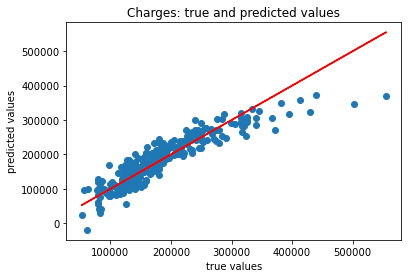

Mean absolute error of the prediction is: 23430.38261573241
Mean squared error of the prediction is: 1020444629.3019729
Root mean squared error of the prediction is: 31944.3990286556
Mean absolute percentage error of the prediction is: 14.430265812279346


In [14]:
X_test = sm.add_constant(X_test)
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

Çizilen grafiğe göre genel olarak çizgi üzerinde devam etsede tüm grafikte doğru saptayamadığı değerler gözlemlenmektedir. Özellikle yüksek değerlerde bir standart tutturamadığı görülmektedir.


-Try to improve your model in terms of prediction performance by adding or removing some variables.


In [15]:
Y = housePrices["SalePrice"]

X = housePrices[["GarageCars",
                 "Kitchen_Qual","GrLivArea","LotArea","OverallQual","1stFlrSF"]]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

X_test = sm.add_constant(X_test)

results = sm.OLS(y_test, X_test).fit()

display(results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     243.6
Date:                Sun, 13 Sep 2020   Prob (F-statistic):          3.80e-107
Time:                        20:51:21   Log-Likelihood:                -3322.9
No. Observations:                 283   AIC:                             6660.
Df Residuals:                     276   BIC:                             6685.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.361e+05   9593.912    -14.189      0.000   -1.55e+05   -1.17e+05
GarageCars    1.154e+04   3192.557      3.615      0.000    5254.825    1.78e+04
Kitchen_Qual  2.214e+04   3829.232      5.783      0.000    1.46e+04    2.97e+04
GrLivArea       40.5819      5.400      7.515      0.000      29.951      51.213
LotArea          1.5882      0.387      4.109      0.000       0.827       2.349
OverallQual   2.047e+04   2240.509      9.138      0.000    1.61e+04    2.49e+04
1stFlrSF        33.7291      5.971      5.649      0.000      21.975      45.483
==============================================================================
Omnibus:                       56.486   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.258
Skew:                           0.838   Prob(JB):                     2.65e-40
Kurtosis:                       6.556   Cond. No.                     6.14e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

P değeri 0.05 ten büyük olan özellikler çıkarılıp açıklamayı arttırmak amacıyla 1stFlrSF özelliği eklenmiştir.

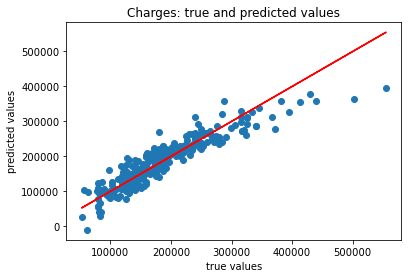

Mean absolute error of the prediction is: 22742.863315476447
Mean squared error of the prediction is: 925343698.0912971
Root mean squared error of the prediction is: 30419.462488533507
Mean absolute percentage error of the prediction is: 14.000952828568463


In [16]:
# We add constant to the model as it's a best practice
# to do so everytime!
X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

Metrikleri karşılaştırdığımız metriklerin azaldığı görülmektedir. Bu da istenen bir sonuçtur.